In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
caminho = 'C:\\olist'

In [59]:
#Fazendo a leitura dos arquivos. Cada arquivo representa uma parte do negócio: clientes, pedidos, itens vendidos, pagamentos, etc.

clientes = pd.read_csv('C:\\olist\\olist_customers_dataset.csv')
localizacao = pd.read_csv('C:\\olist\\olist_geolocation_dataset.csv')
ordem_itens = pd.read_csv('C:\\olist\\olist_order_items_dataset.csv')
ordem_pagamentos = pd.read_csv('C:\\olist\\olist_order_payments_dataset.csv')
avaliacoes = pd.read_csv('C:\\olist\\olist_order_reviews_dataset.csv')
status_pedido = pd.read_csv('C:\\olist\\olist_orders_dataset.csv')
tipo_produto = pd.read_csv('C:\\olist\\olist_products_dataset.csv')
vendedores = pd.read_csv('C:\\olist\\olist_sellers_dataset.csv')
categoria_traducao = pd.read_csv('C:\\olist\\product_category_name_translation.csv')

In [60]:
#Análise geral de pedidos/clientes únicos
print(f"Total de pedidos: {status_pedido['order_id'].nunique()}")
print(f"Total de Clientes únicos: {clientes['customer_unique_id'].nunique()}")

Total de pedidos: 99441
Total de Clientes únicos: 96096


In [61]:
#Faturamento Total
valor_total = ordem_pagamentos['payment_value'].sum()
print(f"Valor Total Movimentado: R$ {valor_total:,.2f}")

Valor Total Movimentado: R$ 16,008,872.12


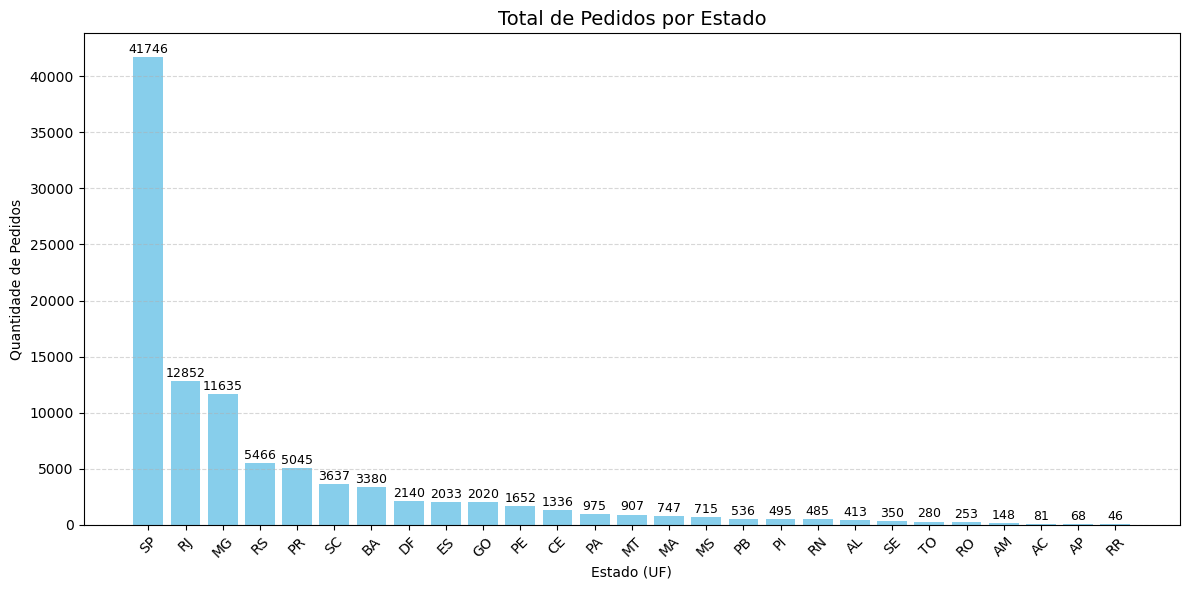

In [62]:
#Análise geral de total de pedidos por Estado
pedidos_estado = clientes.merge(status_pedido, on="customer_id")
pedidos_por_estado = pedidos_estado["customer_state"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
bars = plt.bar(pedidos_por_estado.index, pedidos_por_estado.values, color="skyblue")
plt.title("Total de Pedidos por Estado", fontsize=14)
plt.xlabel("Estado (UF)")
plt.ylabel("Quantidade de Pedidos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle= "--", alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 100,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

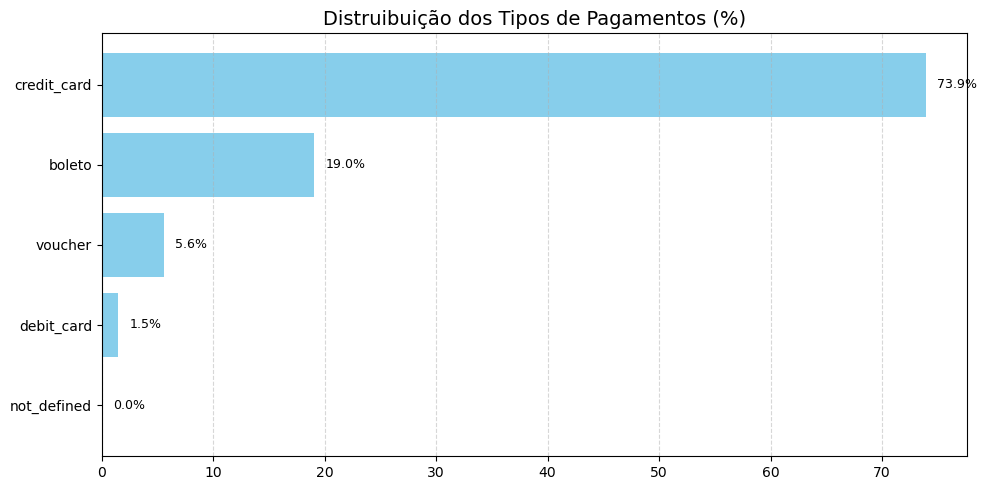

In [63]:
#Meios de pagamentos mais utilizados
tipos_pagamentos = ordem_pagamentos["payment_type"].value_counts(normalize=True).sort_values()*100
plt.figure(figsize=(10,5))
bars= plt.barh(tipos_pagamentos.index, tipos_pagamentos.values, color="skyblue")
plt.title("Distruibuição dos Tipos de Pagamentos (%)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=(0.5))
for i, v in enumerate(tipos_pagamentos.values):
    plt.text(v + 1, i, f'{v:.1f}%', va="center", fontsize=9)
plt.tight_layout()
plt.show()

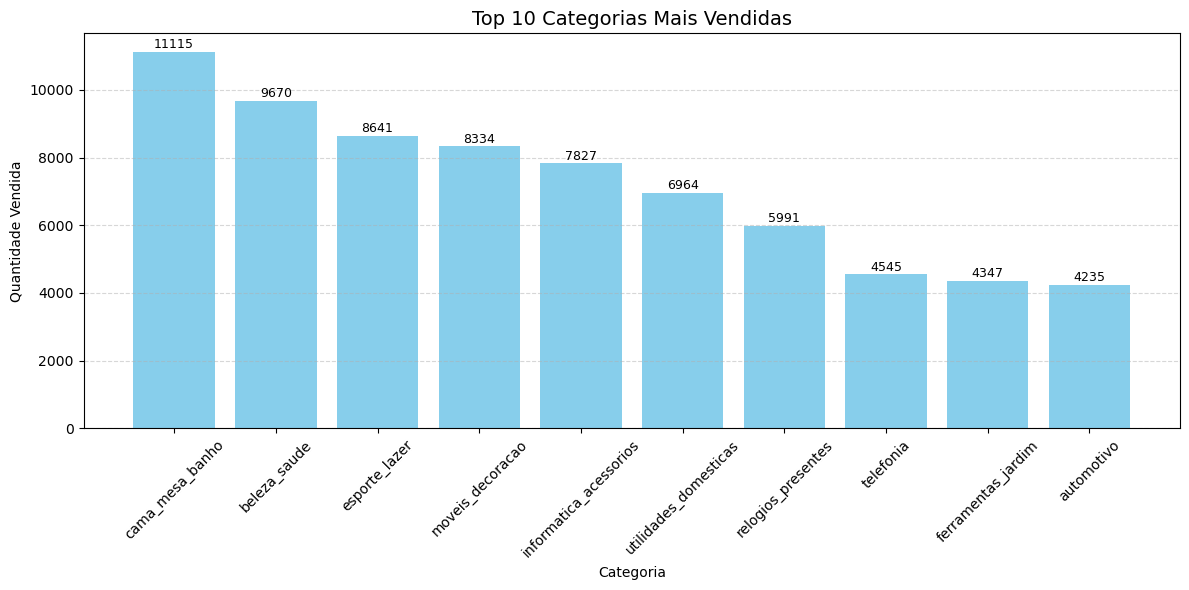

In [64]:
#Categorias Mais Vendidas
ordem_produtos = ordem_itens.merge(tipo_produto, on="product_id")
ordem_produtos = ordem_produtos.merge(categoria_traducao, on="product_category_name")

categorias = ordem_produtos["product_category_name"].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(12,6))
bars = plt.bar(categorias.index, categorias.values, color="skyblue")

plt.title("Top 10 Categorias Mais Vendidas", fontsize=14)
plt.xlabel("Categoria")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
                height + 20,
                f'{int(height)}',
                ha="center",
                va="bottom",
                fontsize=9)

plt.tight_layout()
plt.show()

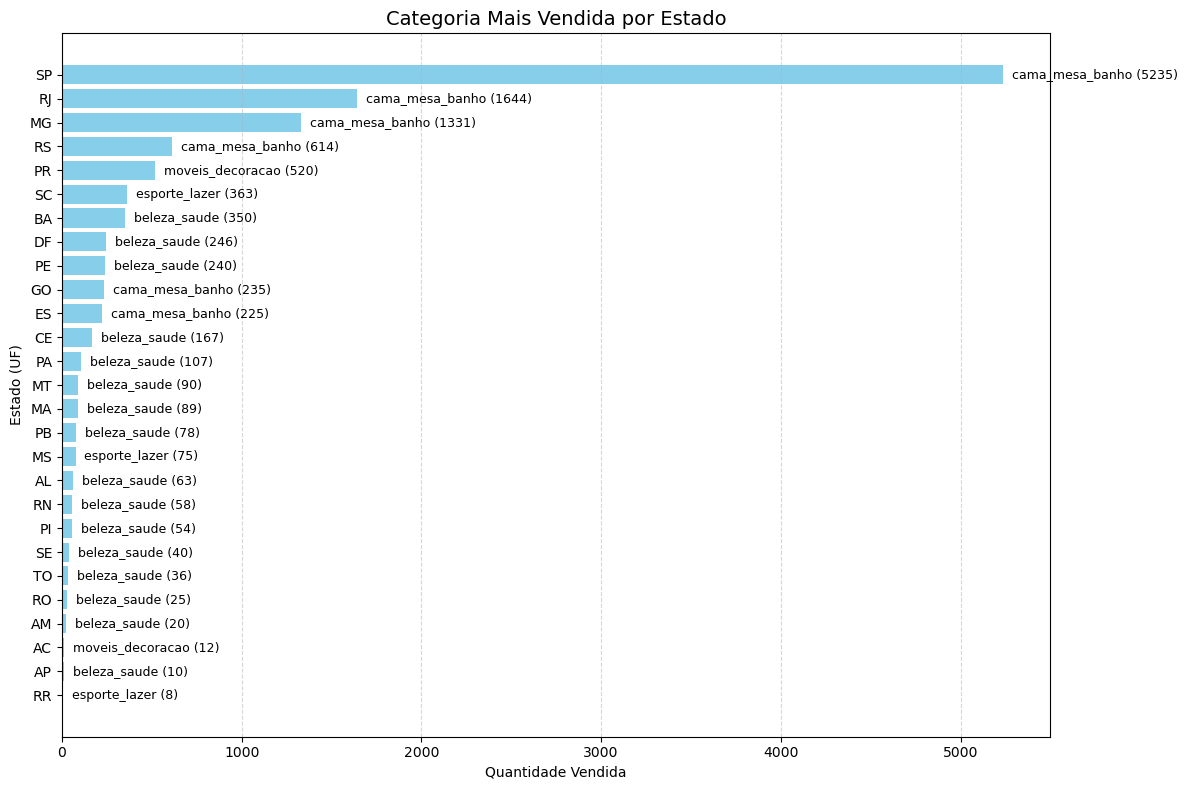

In [65]:
# Merge com os dados necessários (sem tradução)
ordem_produtos = ordem_itens.merge(tipo_produto, on='product_id')
ordem_produtos = ordem_produtos.merge(status_pedido, on='order_id')
ordem_produtos = ordem_produtos.merge(clientes[['customer_id', 'customer_state']], on='customer_id')

vendas_estado_categoria = (ordem_produtos.groupby(['customer_state', 'product_category_name']).size() .reset_index(name='quantidade_vendida'))
top_categoria_estado = (vendas_estado_categoria.sort_values('quantidade_vendida', ascending=False).drop_duplicates('customer_state').sort_values('quantidade_vendida'))

plt.figure(figsize=(12, 8))
bars = plt.barh(top_categoria_estado['customer_state'], top_categoria_estado['quantidade_vendida'], color='skyblue')

plt.title("Categoria Mais Vendida por Estado", fontsize=14)
plt.xlabel("Quantidade Vendida")
plt.ylabel("Estado (UF)")
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, bar in enumerate(bars):
    categoria = top_categoria_estado.iloc[i]['product_category_name']
    qtd = top_categoria_estado.iloc[i]['quantidade_vendida']
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
             f'{categoria} ({qtd})',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


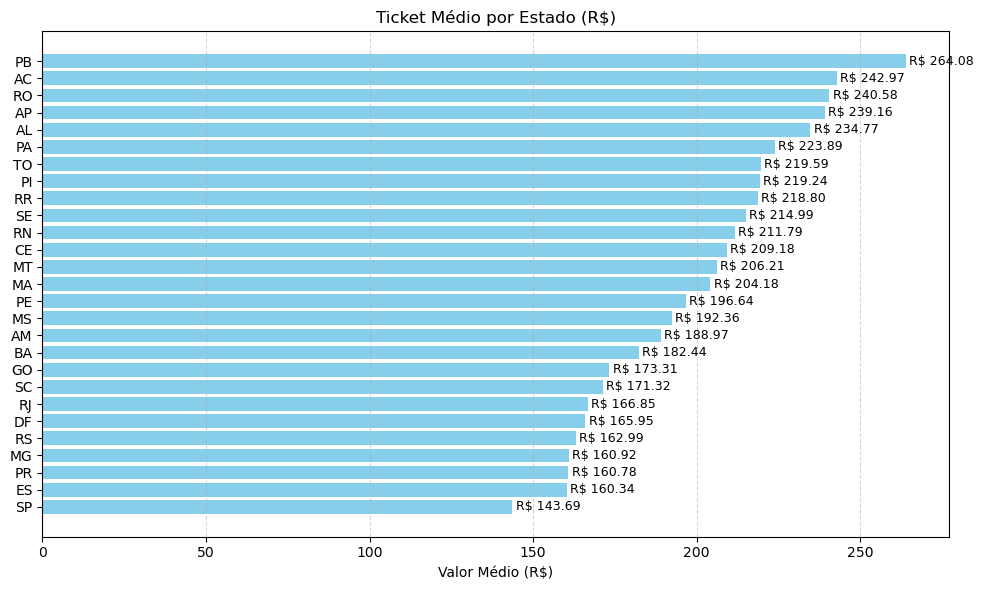

In [90]:
#Ticket Médio por Estado
ticket = ordem_pagamentos.groupby("order_id")["payment_value"].sum().reset_index()
ticket = ticket.merge(status_pedido[["order_id", "customer_id"]], on="order_id")
ticket = ticket.merge(clientes[["customer_id", "customer_state"]], on="customer_id")

ticket_medio_estado = ticket.groupby("customer_state")["payment_value"].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(ticket_medio_estado.index, ticket_medio_estado.values, color="skyblue")
plt.title("Ticket Médio por Estado (R$)")
plt.xlabel("Valor Médio (R$)")
plt.grid(axis="x", linestyle="--", alpha=0.5)

for bar in bars:
    largura = bar.get_width()
    plt.text(largura + 1, bar.get_y() + bar.get_height()/2,
             f'R$ {largura:.2f}', va="center", fontsize=9)

plt.tight_layout()
plt.show()

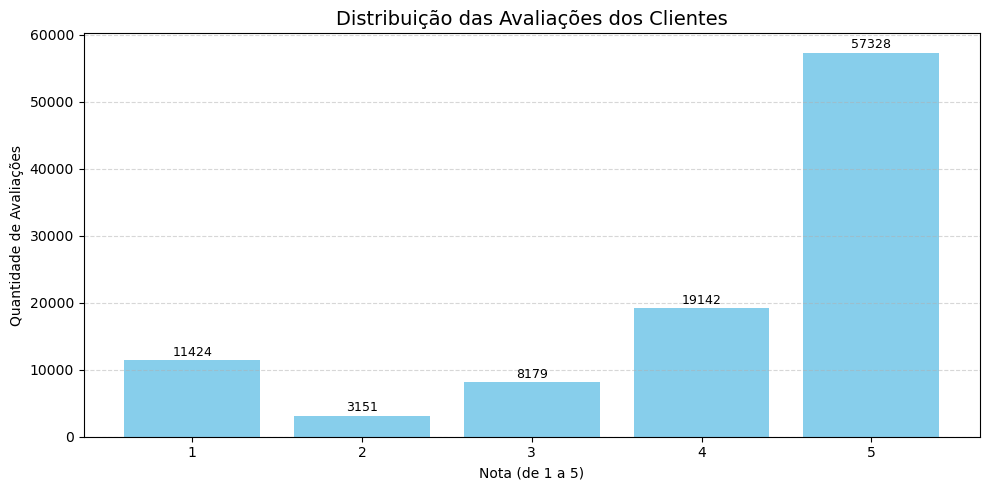

In [66]:
# Agrupando as avaliações em ordem crescente de nota
avaliacoes_ordenadas = avaliacoes["review_score"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(avaliacoes_ordenadas.index.astype(str), avaliacoes_ordenadas.values, color='skyblue')

plt.title("Distribuição das Avaliações dos Clientes", fontsize=14)
plt.xlabel("Nota (de 1 a 5)")
plt.ylabel("Quantidade de Avaliações")
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 200,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


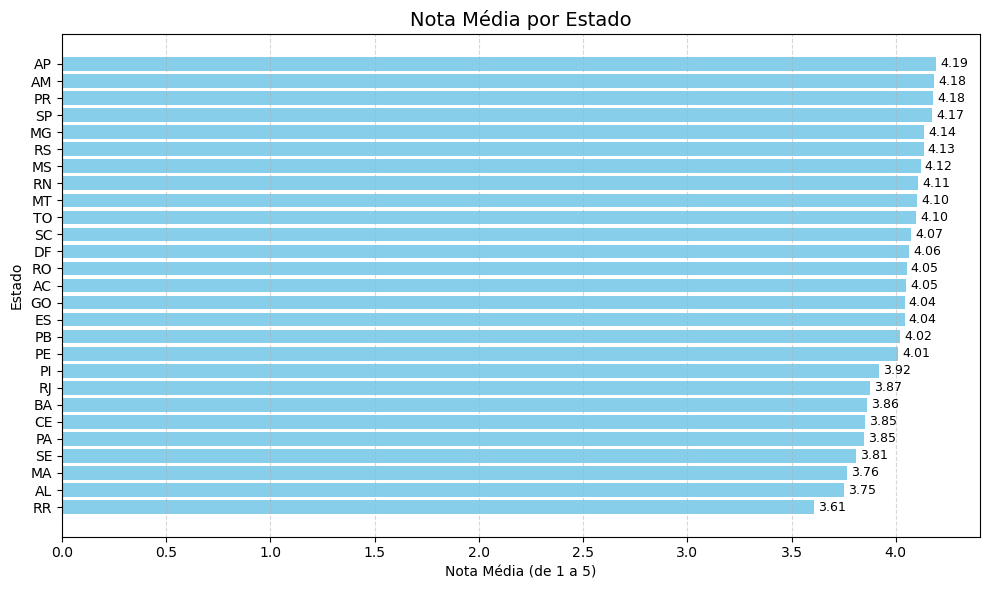

In [67]:
# Agrupando e calculando média de review por estado
clientes_avaliacoes = clientes.merge(status_pedido, on="customer_id").merge(avaliacoes, on="order_id")
avaliacoes_estado = clientes_avaliacoes.groupby("customer_state")["review_score"].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(avaliacoes_estado.index, avaliacoes_estado.values, color='skyblue')

plt.title("Nota Média por Estado", fontsize=14)
plt.xlabel("Nota Média (de 1 a 5)")
plt.ylabel("Estado")
plt.grid(axis='x', linestyle='--', alpha=0.5)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


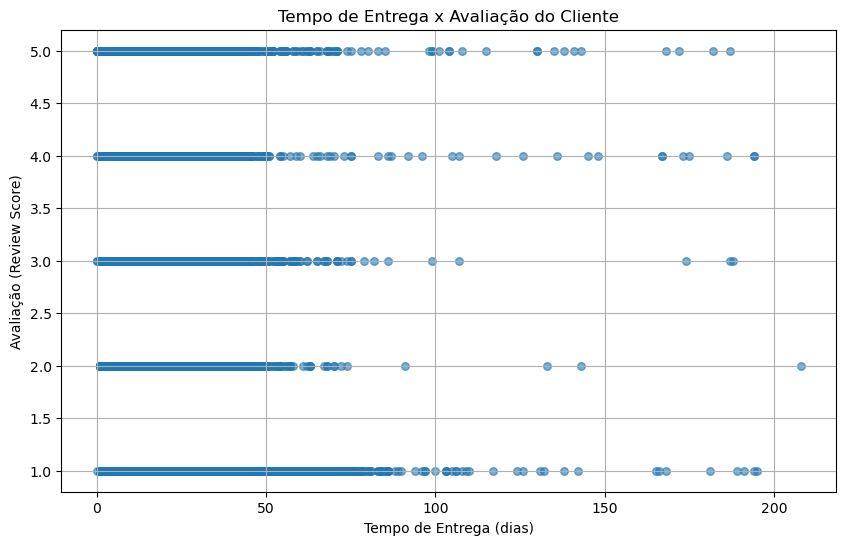

In [70]:
#Tempo médio de entrega por Estados

status_pedido["order_purchase_timestamp"] = pd.to_datetime(status_pedido["order_purchase_timestamp"])
status_pedido["order_delivered_customer_date"] = pd.to_datetime(status_pedido["order_delivered_customer_date"])

status_pedido["tempo_entrega"] = (status_pedido["order_delivered_customer_date"] - status_pedido["order_purchase_timestamp"]).dt.days

tempo_por_estado = clientes.merge(status_pedido, on="customer_id")
tempo_medio_estado = tempo_por_estado.groupby("customer_state")["tempo_entrega"].mean().sort_values()

plt.figure(figsize=(10,6))
plt.scatter(avaliacoes_entrega["tempo_entrega"], avaliacoes_entrega["review_score"], s=30, alpha=0.6)
plt.title("Tempo de Entrega x Avaliação do Cliente")
plt.xlabel("Tempo de Entrega (dias)")
plt.ylabel("Avaliação (Review Score)")
plt.grid(True)
plt.show()

